In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
points = 1000000
x1 = np.random.normal(3, 2, points)
x2 = np.random.normal(-1, 2, points)
e = np.random.normal(0, np.sqrt(2), points)
X = np.column_stack((np.ones(points), x1, x2))
Y = 3 + x1 + 2*x2 + e

In [4]:
def compute_error(X, Y, theta, start, end):
    m = X.shape[0]
    cost = 0
    for i in range(start-1, end):
        cost += (Y[i] - np.dot(theta, X[i]))**2
    cost = cost/(2*(end-start+1))
    return cost

In [5]:
def compute_gradient(X, Y, theta, start, end):
    m = X.shape[0]
    dj_dtheta = np.zeros(3)
    for i in range(start-1, end):
        dj_dtheta += (Y[i] - np.dot(theta, X[i]))*X[i]
    return dj_dtheta/(end-start+1)

In [6]:
m = X.shape[0]
theta = np.zeros(3)
compute_error(X, Y, theta, 1, m)

19.01834671216176

In [7]:
indices = np.arange(len(X))
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

In [10]:
def gradient_descent(X, Y, theta, max_iterations, learn_prm, batch_size, m, k, conv_crit):
    theta_hist = []
    sum = 0
    queue = []
    for i in range(max_iterations):
        batch_i = 1
        while batch_i*batch_size <= m:
            grad = np.array(compute_gradient(X, Y, theta, (batch_i-1)*batch_size + 1, batch_i*batch_size))
            error = compute_error(X, Y, theta, (batch_i-1)*batch_size + 1, batch_i*batch_size)
            theta_hist.append(np.array([theta[0], theta[1], theta[2]]))
            print(f"Iteration {batch_size*i + batch_i} | Theta: {theta} | Grad: {grad} | Sum: {sum})")
            if(batch_size*i + batch_i <= k): 
                queue.append(error)
                sum += error
            else:
                sum = sum + error - queue[0]
                queue.pop(0)
                queue.append(error)
                if(sum < k*conv_crit):
                    return (theta_hist, theta)
            theta = theta + learn_prm*grad
            batch_i += 1
    return (np.array(theta_hist), np.array(theta))

In [32]:
max_iterations = 100
learn_prm = 0.001
batch_size = 1
conv_crit = 0.1
k = 10
(theta_hist, theta_new) = gradient_descent(X, Y, theta, max_iterations, learn_prm, batch_size, m, k, conv_crit)
print(theta_new)

Iteration 1 | Theta: [0. 0. 0.] | Grad: [ 2.43260261  6.64977161 -1.17150241] | Sum: 0)
Iteration 2 | Theta: [ 0.0024326   0.00664977 -0.0011715 ] | Grad: [12.28145733 62.33845379  7.03865585] | Sum: 2.9587777182241854)
Iteration 3 | Theta: [0.01471406 0.06898823 0.00586715] | Grad: [ 9.13278399 39.35452823 14.89961711] | Sum: 78.37587478838941)
Iteration 4 | Theta: [0.02384684 0.10834275 0.02076677] | Grad: [ 8.06600387 30.73689554  7.62298265] | Sum: 120.0797465176638)
Iteration 5 | Theta: [0.03191285 0.13907965 0.02838975] | Grad: [-0.5408788  -0.65293541  1.20425964] | Sum: 152.60995575868864)
Iteration 6 | Theta: [0.03137197 0.13842671 0.02959401] | Grad: [-2.47947211  2.15829533  7.86629677] | Sum: 152.75623069568425)
Iteration 7 | Theta: [0.0288925  0.14058501 0.03746031] | Grad: [-1.56500327 -5.34451966  5.86064701] | Sum: 155.83012167008116)
Iteration 8 | Theta: [0.02732749 0.13524049 0.04332096] | Grad: [ 3.16310305  7.98995855 -2.30204125] | Sum: 157.05473928370154)
Iteratio

In [29]:
theta_new = np.array([2.73753315, 1.05221441, 1.98514639])

In [33]:
test_data = pd.read_csv("../data/q2/q2test.csv").to_numpy()
testX = test_data[:, 0:2]
ones_column = np.ones((testX.shape[0], 1))
testX = np.hstack((ones_column, testX))
testY = test_data[:, 2]
error_hyp = compute_error(testX, testY, theta_new, 1, testX.shape[0])
theta_actual = np.array([3, 1, 2])
error_act = compute_error(testX, testY, theta_actual, 1, testX.shape[0])
(error_hyp, error_act)

(1.060084646757679, 0.9829469215000091)

In [ ]:
theta_hist_new = list(theta_hist)
theta_hist_new

[[0.0, 0.0, 0.0],
 [0.003820934576002483, 0.014694880417695552, 0.003724490593701173],
 [0.007939016212447473, 0.031104319922135158, 0.007069419113947591],
 [0.012176476842785163, 0.047786656627567634, 0.011224418372685945],
 [0.015902878513557775, 0.06298249154106493, 0.01487767630393904],
 [0.019589171148693747, 0.07804175033374286, 0.019259089045826988],
 [0.02326723396219859, 0.09317960918324876, 0.023089437867103404],
 [0.026828648660440074, 0.1075646793523364, 0.027299776203623123],
 [0.030478863830149413, 0.12234612355171635, 0.03188669202314096],
 [0.03428065894412501, 0.1364629372258354, 0.036694393202200415],
 [0.037649132179427724, 0.1498041549995477, 0.04093358843602851],
 [0.04128121815877907, 0.1639733945221893, 0.04530990687203678],
 [0.045119656158880826, 0.17924459586093933, 0.049820457258464096],
 [0.04840872045282815, 0.19185091113415975, 0.05406418241248619],
 [0.05196472284015357, 0.20587241329906628, 0.05899651117466867],
 [0.055320343292847886, 0.2196850739826178

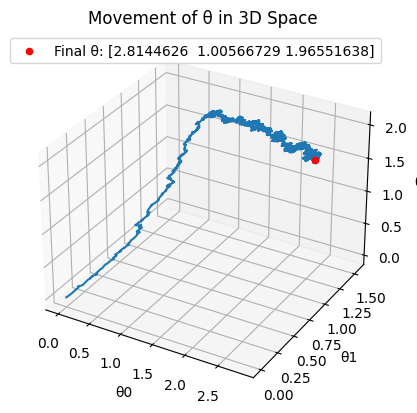

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract θ values for each parameter (θ0, θ1, θ2)
theta0_vals = [theta[0] for theta in theta_hist]
theta1_vals = [theta[1] for theta in theta_hist]
theta2_vals = [theta[2] for theta in theta_hist]

# Plot the movement of θ in 3D space
ax.plot(theta0_vals, theta1_vals, theta2_vals)
ax.scatter(theta_new[0], theta_new[1], theta_new[2], c='red', label=f"Final θ: {theta_new}")

# Set labels for the axes
ax.set_xlabel('θ0')
ax.set_ylabel('θ1')
ax.set_zlabel('θ2')

# Add a legend
ax.legend()

# Set title and show the plot
plt.title('Movement of θ in 3D Space')
plt.show()